## Formulação matemática do problema da Grade Horária na UFPR Campus Pontal (Timetabling)


### Objetivo

O objetivo desta modelagem é minimizar a quantidade de vezes que os professores da UFPR Campus Pontal vão ao campus.
Vamos levar em conta dados originais obtidos em contato com a universidade e restrições reais.


### Parâmetros

Para modelar, temos as variáveis: 

* **T**: conjunto de turmas (8 turmas em LCE)
* **P**: conjunto de professores (16 professores em LCE)
* **H**: conjunto de horários das aulas (1 ou 2 - primeiro ou segundo horário)
* **D**: conjunto de dias da semana que ocorrem aulas (varia de segunda a sexta)

Total de combinações: $8 * 16 * 2 * 5 = 1280$.


### Variáveis de Decisão

As variáveis $x_{p,t,d,h}$ são inteiras e binárias, que definem se o professor $p$ irá (1) ou não (0) ministrar aula para a turma $t \in T$ no dia $d \in D$ e no horário $h \in H$.


### Problema de Otimização

$$
\begin{align}
    \text{minimizar \ \ \ \ \ } & \sum_{d=1}^{5}x_{p,t,d,h} \\
    \text{sujeito a \ \ \ \ \ } & \sum_{p=1}^{16}x_{p,t,d,h} \leq 1 \\
                                & \sum_{t=1}^{8}x_{p,t,d,h} \leq 1 \\
                                & \sum_{p=1}^{16}\sum_{h=1}^{2}x_{p,t,d,h} = HT_{t,d} \\
                                & \sum_{d=1}^{5}\sum_{h=1}^{2}x_{p,t,d,h} = R_{p,t} \\
                                & \sum_{t \in T_1}\sum_{p \in P_1}x_{p,t,d,h} = 2 \\
                                & \sum_{h=1}^{}x_{ptdh} \leq 6
\end{align}
$$

onde:

- $H$:
- $T_{t,d}$:
- $R_{p,t}$:
- $T_1$: subconjunto das turmas $T$ com aulas comuns às três habilitações
- $P_1$: subconjunto dos professores $P$ que ministram aulas nas disciplinas comuns

### Explicação das Restrições

1. Cada combinação de turma, horário e dia da semana terá somente 1 professor alocado
2. Cada combinação de professor, horário e dia da semana terá somente 1 turma sendo ministrada
3. 
4.
5.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

In [20]:
def constroi_lista(df:pd.DataFrame, coluna:str):
    lista = list(df[df['Curso'].isin(['LCE', 'LCEFISICA', 'LCEMATEMATICA', 'LCEQUIMICA'])][coluna].dropna().unique())
    return lista

# def constroi_lista(df:pd.DataFrame, coluna:str):
#     lista = list(df[df['Curso'].isin(['LCE'])][coluna].dropna().unique())
#     return lista

In [21]:
grade_compilada = pd.read_csv('dados/grade_compilada.csv', sep=';')
grade_compilada_tratado = pd.read_csv('dados/grade_compilada_tratado.csv', sep=',')
hora_aula_materia = pd.read_csv('dados/hora_aula_materia.csv', sep=',')
materias_comuns = pd.read_csv('dados/materias_comuns.csv', sep=',')
professores_materias = pd.read_csv('dados/professores_materias.csv', sep=',')

In [22]:
materias_comuns.head()

,Professor,Campus,Materia,Semestre_Curso
0,VALDIR,MIRASOL,PRATICAPEDAGOGICADOENSINOCEM335,5_LCEFISICA
1,JEINNI,MIRASOL,DIDATICADASCIENCIASCEM334,5_LCEFISICA
2,JEINNI,MIRASOL,ESTAGIOCIENCIASICEM336,5_LCEFISICA
3,ELIANE,MIRASOL,DIVULGACAOCIENTIFICACEM326,5_LCEFISICA
4,VALDIR,MIRASOL,PRATICAPEDAGOGICADOENSINOCEM335,5_LCEMATEMATICA


In [23]:
professores_materias[professores_materias['Curso'].isin(['LCE'])].count()

Professor     14
Campus        14
Curso         14
Tipo_Curso    14
Materia       14
dtype: int64

## Modelagem


In [24]:
# altera o index do hora_aula_materia
hora_aula_materia.set_index(['Professor','Materia','Semestre_Curso'], inplace=True) 

In [25]:
hora_aula_materia

Curso  \
Professor Materia                             Semestre_Curso                   
ALEX      CALCULODIFERENCIALEINTEGRALI        1_EAS                      EAS   
          CALCULOI                            1_ECV                      ECV   
          GEOMETRIAECONSTRUCOESCEM319         5_LCEMATEMATICA  LCEMATEMATICA   
ARMANI    INTRODUCAOAENGENHARIAAMBIENTAL      1_EAS                      EAS   
          POLUICAODOAR                        7_EAS                      EAS   
...                                                                      ...   
VALDIR    PRATICAPEDAGOGICADOENSINOCEM335     5_LCEMATEMATICA  LCEMATEMATICA   
                                              5_LCEQUIMICA        LCEQUIMICA   
          PRATICAPEDAGOGICAMATEMATICAIICEM339 7_LCEMATEMATICA  LCEMATEMATICA   
VIRNEI    FISICAGERAL                         3_EAQ                      EAQ   
          FISICAII                            3_EAS                      EAS   

                                                               Total_Horas  \
Professor Materia                             Semestre_Curso                 
ALEX      CALCULODIFERENCIALEINTEGRALI        1_EAS                      4   
          CALCULOI                            1_ECV                      4   
          GEOMETRIAECONSTRUCOESCEM319         5_LCEMATEMATICA            4   
ARMANI    INTRODUCAOAENGENHARIAAMBIENTAL      1_EAS                      4   
          POLUICAODOAR                        7_EAS                      3   
...                                                                    ...   
VALDIR    PRATICAPEDAGOGICADOENSINOCEM335     5_LCEMATEMATICA            2   
                                              5_LCEQUIMICA               2   
          PRATICAPEDAGOGICAMATEMATICAIICEM339 7_LCEMATEMATICA            4   
VIRNEI    FISICAGERAL                         3_EAQ                      4   
          FISICAII                            3_EAS                      3   

                                                               Periodos_Total  
Professor Materia                             Semestre_Curso                   
ALEX      CALCULODIFERENCIALEINTEGRALI        1_EAS                       2.0  
          CALCULOI                            1_ECV                       2.0  
          GEOMETRIAECONSTRUCOESCEM319         5_LCEMATEMATICA             2.0  
ARMANI    INTRODUCAOAENGENHARIAAMBIENTAL      1_EAS                       2.0  
          POLUICAODOAR                        7_EAS                       2.0  
...                                                                       ...  
VALDIR    PRATICAPEDAGOGICADOENSINOCEM335     5_LCEMATEMATICA             1.0  
                                              5_LCEQUIMICA                1.0  
          PRATICAPEDAGOGICAMATEMATICAIICEM339 7_LCEMATEMATICA             2.0  
VIRNEI    FISICAGERAL                         3_EAQ                       2.0  
          FISICAII                            3_EAS                       2.0  

[194 rows x 3 columns]

In [26]:
def get_hora_aula_materia(professor,materia, turma, df=hora_aula_materia):
    resultado = hora_aula_materia.query("Professor == @professor and Semestre_Curso == @turma and Materia == @materia")
    if not resultado.empty:
        return resultado['Periodos_Total'].iloc[0]
    else:
        return 0

In [27]:
get_hora_aula_materia('ALEX','CALCULODIFERENCIALEINTEGRALI', '1_EAS')

2.0

In [28]:
# Inicialização do modelo
model = gp.Model("Alocação_Professores")

# Define os conjuntos
professores = constroi_lista(df = grade_compilada_tratado, coluna = 'Professor') # 17 (atual) 
turmas = constroi_lista(df = grade_compilada_tratado, coluna = 'Semestre_Curso') # 5 (atual) 
# atualmente não estamos segmentando o 5º e 7º em qui, fis e mat e temos o 9º que não estava no artigo
dias_semana = constroi_lista(df = grade_compilada_tratado, coluna = 'Dia') # range(1, 6)
horarios = range(1, 3) 
disciplinas = constroi_lista(df = grade_compilada_tratado, coluna = 'Materia') 

professores_comuns = materias_comuns['Professor'].unique().tolist()
turmas_comuns = materias_comuns['Semestre_Curso'].unique().tolist()
disciplinas_comuns = materias_comuns['Materia'].unique().tolist()

# Cria as variáveis de decisão
x = model.addVars(professores, disciplinas,turmas, dias_semana, horarios, vtype=GRB.BINARY, name="x")

#variáveis auxiliares
# r2 = model.addVars(professores, vtype=GRB.BINARY, name="r2") # colocar na FO
# # Define a função objetivo
model.setObjective(gp.quicksum(x[p,m,t,d,h] 
                               for p in professores 
                               for m in disciplinas 
                               for t in turmas 
                               for d in dias_semana 
                               for h in horarios), GRB.MINIMIZE)

# Restrição 2 - Cada professor tem no máximo uma aula em um horário específico
for p in professores:
    for d in dias_semana:
        for h in horarios:
            model.addConstr(gp.quicksum(x[p,m,t,d,h] 
                                        for m in disciplinas 
                                        for t in turmas 
                                        ) <= 1 , name=f'R2_{p}_{d}_{h}') # precisei adicionar o if para não dar conflito com 6

# Restrição 3 - Cada turma tem no máximo um professor em um horário específico
for t in turmas:
    for d in dias_semana:
        for h in horarios:
            model.addConstr(gp.quicksum(x[p,m,t,d,h] 
                                        for p in professores 
                                        for m in disciplinas 
                                        ) <= 1 , name=f'R3_{t}_{d}_{h}') # precisei adicionar o if para não dar conflito com 6

# Restrição 5 
# "associa cada disciplina ao professora que ira lecionar cada uma delas e quantos periodos deve aparecer"
for p in professores:
  for t in turmas:
    for m in disciplinas:
        model.addConstr(gp.quicksum(x[p,m,t,d,h] for d in dias_semana for h in horarios ) == get_hora_aula_materia(p,m,t), name=f'R5_{p}_{m}_{t}') # R_p,t

# Restrição 6 # Conflito com essa tbm
# # T1 ⊂ T (subconj. das turmas com aulas comuns) e P1 ⊂ P (subconj. dos professores das aulas comuns)
for p in professores_comuns:
    for m in disciplinas_comuns:
        model.addConstr(gp.quicksum(x[p,m,t,d,h] 
                                    for d in dias_semana 
                                    for h in horarios 
                                    for t in turmas_comuns) <= 3, name=f'R6_{p}_{m}') 

# Restrição 7
# Garante que as aulas sejam alocadas nas 6 salas de aulas disponíveis
# Isto é, a quantidade de aulas a cada horário deve ser no máximo 6, pois esse é o limite de salas
for h in horarios:
    for d in dias_semana:    
        model.addConstr(gp.quicksum(x[p,m,t,d,h] 
                                    for p in professores 
                                    for m in disciplinas
                                    for t in turmas) <= 6, name=f'R7_{d}_{h}')

model.write('modelo.lp')


In [29]:
# Resolve o modelo
model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4230 rows, 39680 columns and 159080 nonzeros
Model fingerprint: 0xd8ece7c1
Variable types: 0 continuous, 39680 integer (39680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 58.0000000
Presolve removed 4031 rows and 39290 columns
Presolve time: 0.07s
Presolved: 199 rows, 390 columns, 1450 nonzeros
Variable types: 0 continuous, 390 integer (390 binary)

Explored 0 nodes (0 simplex iterations) in 0.11 seconds (0.03 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 58 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.800000000000e+0

In [30]:
model.write('solucao.sol')

In [31]:
# Supondo que model.Status == GRB.OPTIMAL e x tenha os resultados
dados = []
for p, m, t, d, h in x:
    if x[p, m, t, d, h].X > 0:
        dados.append({
            "Turma": t,
            "Professor": p,
            "Disciplina": m,            
            "Dia": d,
            "Periodo": h
        })

# Cria um DataFrame a partir dos dados
df_resultado = pd.DataFrame(dados)
# df_resultado = df_resultado.sort_values(by=["Turma", "Disciplina", "Dia", "Periodo"])


In [32]:
df_resultado[df_resultado['Dia']=="QUINTA"].sort_values('Periodo')

,Turma,Professor,Disciplina,Dia,Periodo
12,1_LCE,ELIANE,FUNDAMENTOSDAEDUCACAOLCE113,QUINTA,1
27,3_LCE,JEINNI,METODOLOGIACIENTIFICALCE136,QUINTA,1
36,5_LCEFISICA,EMIR,FISICAEXPERIMENTALICEM347,QUINTA,1
39,5_LCEQUIMICA,VALDIR,PRATICAPEDAGOGICADOENSINOCEM335,QUINTA,1
57,7_LCEQUIMICA,HARUMI,FISICOQUIMICACEM365,QUINTA,1
5,1_LCE,LUCIANA,MATEMATICAELEMENTARLCE111,QUINTA,2
10,3_LCE,BATISTA,FISICAIIIPP005,QUINTA,2
17,5_LCEQUIMICA,ELIANE,DIVULGACAOCIENTIFICACEM326,QUINTA,2
29,5_LCEFISICA,JEINNI,DIDATICADASCIENCIASCEM334,QUINTA,2
41,7_LCEFISICA,VALDIR,FISICAEXPERIMENTALIIICEM349,QUINTA,2


C:\Users\talia\AppData\Local\Temp\ipykernel_26308\921958380.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grade_horaria = df_turma.pivot('Dia', 'Periodo', 'Professor')


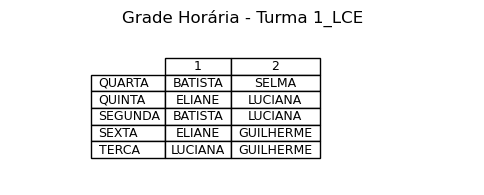

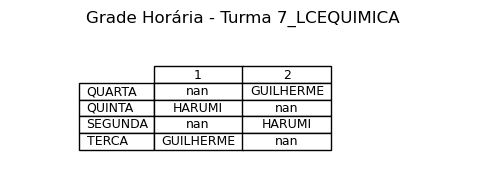

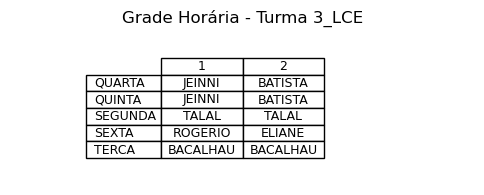

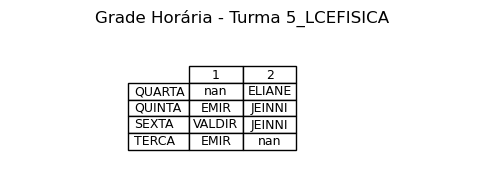

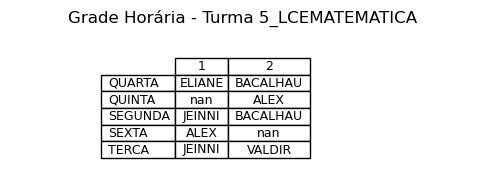

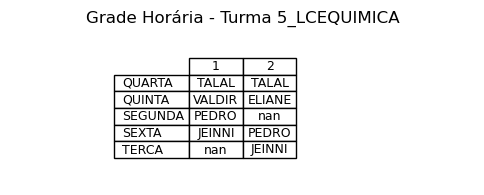

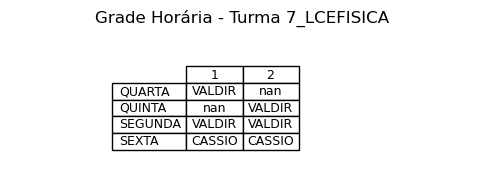

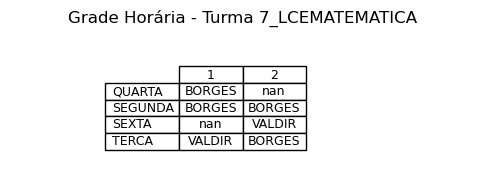

In [33]:


# Função para criar a grade horária visualizada por turma
def plotar_grade_horaria(df):
    # Obter todas as turmas únicas
    turmas = df['Turma'].unique()
    
    for turma in turmas:
        # Filtrar o DataFrame para a turma atual
        df_turma = df[df['Turma'] == turma]

        # Criar um pivot table para visualização
        grade_horaria = df_turma.pivot('Dia', 'Periodo', 'Professor')

        # Plotar a grade horária manualmente
        fig, ax = plt.subplots(figsize=(6, 2))
        ax.axis('off')
        table = ax.table(cellText=grade_horaria.values,
                         rowLabels=grade_horaria.index,
                         colLabels=grade_horaria.columns,
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.auto_set_column_width(col=list(range(len(grade_horaria.columns))))
        plt.title(f'Grade Horária - Turma {turma}')
        plt.show()

# Chamar a função para plotar a grade horária
plotar_grade_horaria(df_resultado)


C:\Users\talia\AppData\Local\Temp\ipykernel_26308\2310566323.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grade_horaria = df_professor.pivot('Dia', 'Periodo', 'Turma')


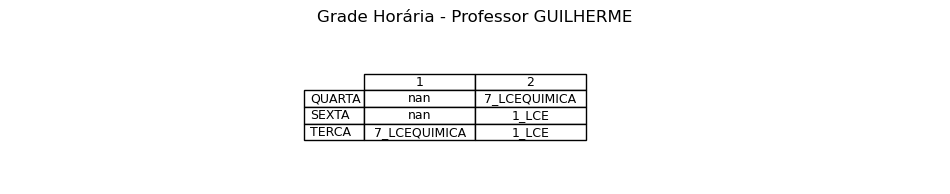

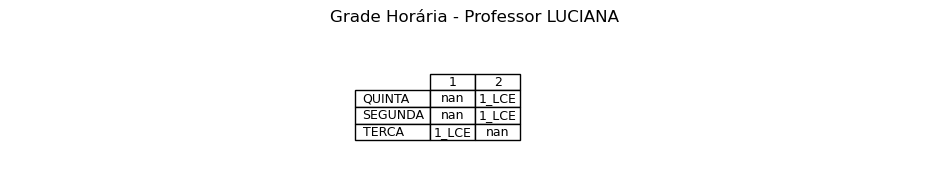

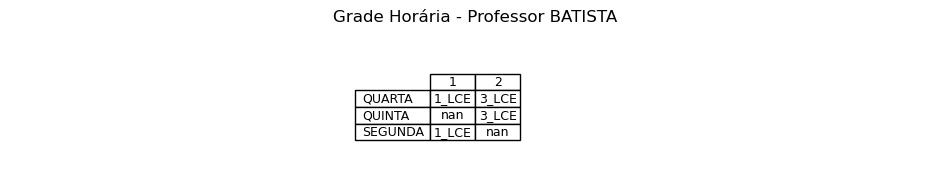

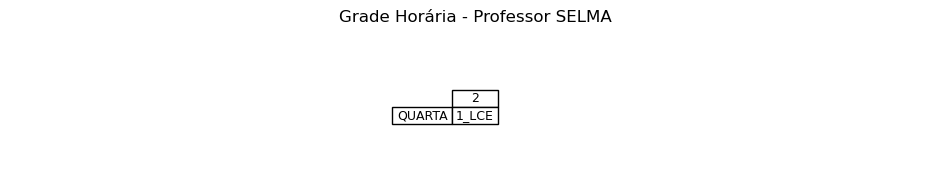

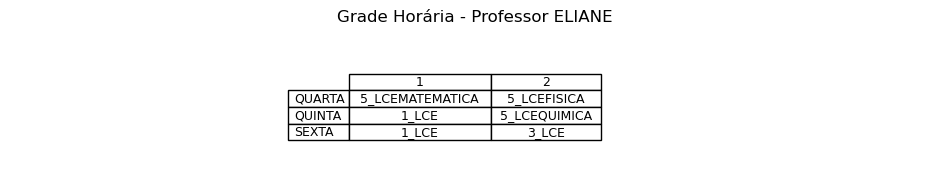

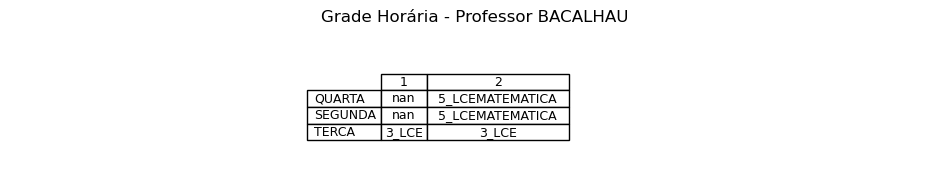

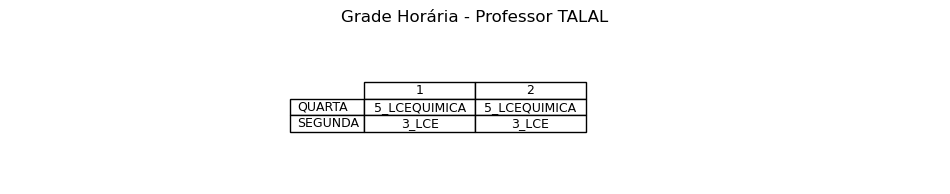

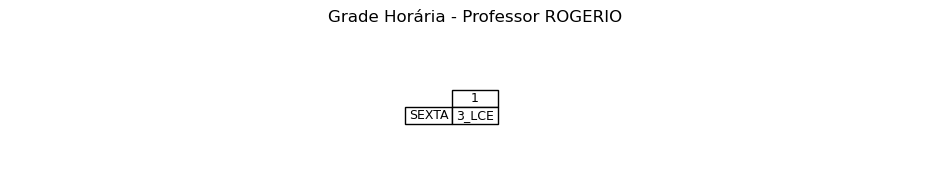

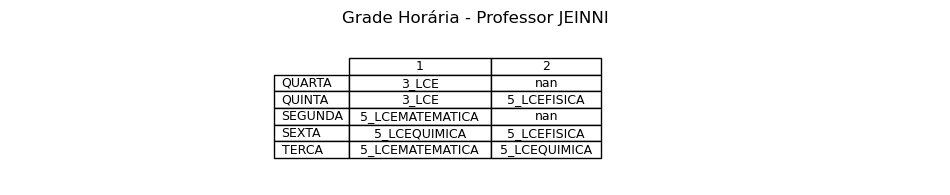

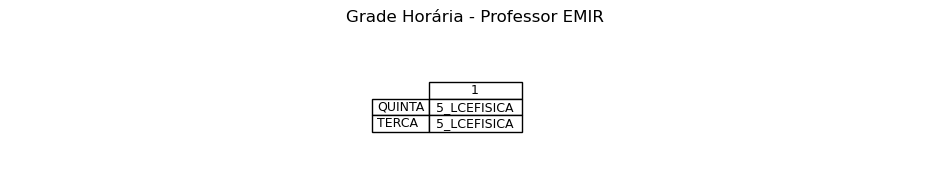

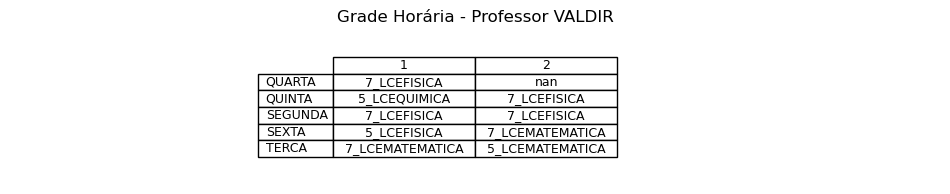

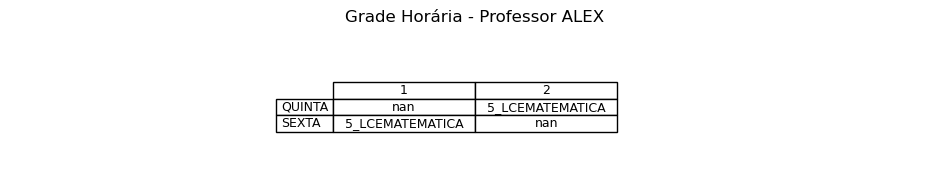

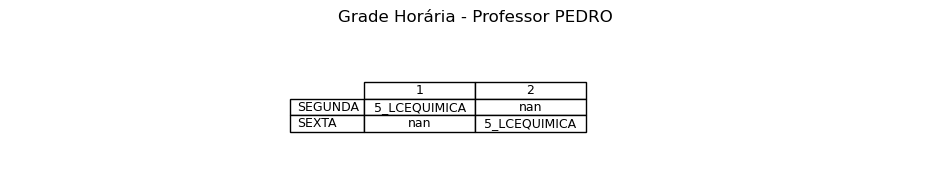

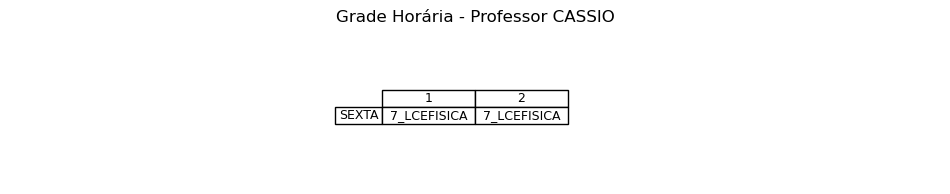

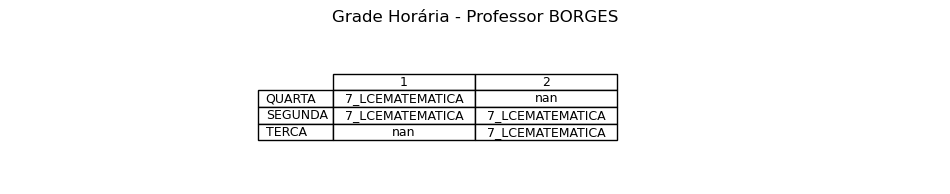

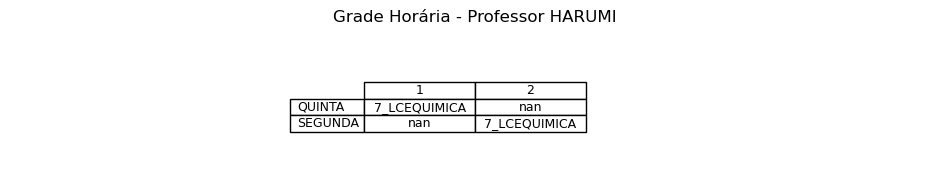

In [34]:

# Função para criar a grade horária visualizada por professor
def plotar_grade_horaria_por_professor(df):
    # Obter todos os professores únicos
    professores = df['Professor'].unique()
    
    for professor in professores:
        # Filtrar o DataFrame para o professor atual
        df_professor = df[df['Professor'] == professor]

        # Criar um pivot table para visualização
        grade_horaria = df_professor.pivot('Dia', 'Periodo', 'Turma')

        # Plotar a grade horária manualmente
        fig, ax = plt.subplots(figsize=(12, 2))
        ax.axis('off')
        table = ax.table(cellText=grade_horaria.values,
                         rowLabels=grade_horaria.index,
                         colLabels=grade_horaria.columns,
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.auto_set_column_width(col=list(range(len(grade_horaria.columns))))
        plt.title(f'Grade Horária - Professor {professor}')
        plt.show()

# Chamar a função para plotar a grade horária
plotar_grade_horaria_por_professor(df_resultado)


In [35]:
# Exibir as variáveis com valor igual a 1
for v in model.getVars():
   
    if v.X > 0.99:
        print(f'{v.VarName}: {v.X}')

x[GUILHERME,QUIMICAILCE112,1_LCE,TERCA,2]: 1.0
x[GUILHERME,QUIMICAILCE112,1_LCE,SEXTA,2]: 1.0
x[GUILHERME,PRATICAPEDAGOGICAQUIMICAIICEM362,7_LCEQUIMICA,TERCA,1]: 1.0
x[GUILHERME,PRATICAPEDAGOGICAQUIMICAIICEM362,7_LCEQUIMICA,QUARTA,2]: 1.0
x[LUCIANA,MATEMATICAELEMENTARLCE111,1_LCE,SEGUNDA,2]: 1.0
x[LUCIANA,MATEMATICAELEMENTARLCE111,1_LCE,QUINTA,2]: 1.0
x[LUCIANA,GEOMETRIAANALITICAPP002,1_LCE,TERCA,1]: 1.0
x[BATISTA,FISICAIPP001,1_LCE,SEGUNDA,1]: 1.0
x[BATISTA,FISICAIPP001,1_LCE,QUARTA,1]: 1.0
x[BATISTA,FISICAIIIPP005,3_LCE,QUARTA,2]: 1.0
x[BATISTA,FISICAIIIPP005,3_LCE,QUINTA,2]: 1.0
x[SELMA,FUNDAMENTOSDAEXTENSAOPP027,1_LCE,QUARTA,2]: 1.0
x[ELIANE,FUNDAMENTOSDAEDUCACAOLCE113,1_LCE,QUINTA,1]: 1.0
x[ELIANE,PSICOLOGIADAEDUCACAOLCE114,1_LCE,SEXTA,1]: 1.0
x[ELIANE,ETICAEEDUCACAOLCE134,3_LCE,SEXTA,2]: 1.0
x[ELIANE,DIVULGACAOCIENTIFICACEM326,5_LCEFISICA,QUARTA,2]: 1.0
x[ELIANE,DIVULGACAOCIENTIFICACEM326,5_LCEMATEMATICA,QUARTA,1]: 1.0
x[ELIANE,DIVULGACAOCIENTIFICACEM326,5_LCEQUIMICA,QUINTA,2]: 1

In [36]:
from collections import defaultdict

# Dicionário para agrupar variáveis pelo prefixo
resultados = defaultdict(list)

# Filtrar e agrupar variáveis com valor igual a 1 e que começam com 'r'
for v in model.getVars():
    if v.VarName.startswith('r') and v.X > 0.99:
        prefix = v.VarName.split('[')[0]  # Extrair o prefixo (ex: r2, r3, r5)
        resultados[prefix].append(v.VarName)

# Imprimir os resultados de forma organizada
for prefix, vars in resultados.items():
    print(f"\n{prefix}:")
    for var in vars:
        print(f"  {var}: 1.0")
